<a href="https://colab.research.google.com/github/meeshu/disruptions/blob/main/duration_frequency_descriptive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# @title
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
!pwd
from google.colab.data_table import DataTable
DataTable.max_columns = 30

/content


In [3]:
#importing data from github. switched from google drive.
url= 'https://raw.githubusercontent.com/meeshu/disruptions/refs/heads/main/data/Survey%20data%20-%20all-participants-coding-beta.csv' # Changed url to raw data url
df=pd.read_csv(url)
df.head()

,pid,old-pid,gid,unique gid,goaldisrupted,old-cid,goal-statement,Goal categories,Unnamed: 8,cid,...,Disruption labor produced.2,affect-goal,change,Goal changes,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,S01,S01,goal1,S01goal1,"S01goal2, S01goal4",circ1,Financial independence,Financial Stability/Safety,NaN,circ1,...,NaN,I live far away from opportunities/ There are ...,I have shifted to trying to find work online,Changed strategy,NaN,NaN,NaN,NaN,NaN,NaN
1,S01,S01,goal1,S01goal1,NaN,circ2,Financial independence,Financial Stability/Safety,NaN,circ2,...,NaN,I feel things are hopeless,"If I were more motivated, I could be more fina...",Abandoned,NaN,NaN,NaN,NaN,NaN,NaN
2,S01,S01,goal1,S01goal1,NaN,circ3,Financial independence,Financial Stability/Safety,NaN,circ3,...,NaN,I cannot stand or walk much,"I have to work more from home, but my level of...",Changed strategy,NaN,NaN,NaN,NaN,NaN,NaN
3,S01,S01,goal2,S01goal2,NaN,circ1,Quell fears,Mental health and wellbeing,NaN,circ1,...,NaN,I am fearful of the enemy (his father),I made an appt with a dr despite wanting to ha...,Changed strategy,NaN,NaN,NaN,NaN,NaN,NaN
4,S01,S01,goal2,S01goal2,NaN,circ2,Quell fears,Mental health and wellbeing,NaN,circ2,...,NaN,Fearful I won't be able to sell home if I tried,I have to trust the universe/God,No change,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [4]:
# @title
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.rstrip()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df = df.drop(columns=['old-pid'])
df = df.drop(columns=['old-cid'])
df['disruption_labor_aggregated'] = df[['disruption_labor_produced',
                                                          'disruption_labor_produced.1',
                                                          'disruption_labor_produced.2']].apply(
    lambda row: ', '.join(row.dropna().astype(str)), axis=1)

In [5]:
# @title
df['how-long'] = df['how-long'].apply(
    lambda x: "No disruption" if isinstance(x, str) and "no disruption" in x else x
)
df['disruption_status'] = df.apply(
    lambda x: 'No Disruption' if (x['situation_that_occurred'] == "No disruption")
    #or(x['disruption_labor_aggregated'] in ["No labor- positive disruption"])
    or (x['how-long'] in ["No disruption"])
    else 'Disruption', axis=1)

df['pid*gid*cid'] = df['pid'] + "*" + df['gid'] + "*" + df['cid']

df

,pid,gid,unique_gid,goaldisrupted,goal-statement,goal_categories,cid,uniquecid,goal_scope,rep-id,...,affect-logistical,disruption_labor_produced,disruption_labor_produced.1,disruption_labor_produced.2,affect-goal,change,goal_changes,disruption_labor_aggregated,disruption_status,pid*gid*cid
0,S01,goal1,S01goal1,"S01goal2, S01goal4",Financial independence,Financial Stability/Safety,circ1,S01goal1circ1,Long term,NaN,...,NaN,Logistical,NaN,NaN,I live far away from opportunities/ There are ...,I have shifted to trying to find work online,Changed strategy,Logistical,Disruption,S01*goal1*circ1
1,S01,goal1,S01goal1,NaN,Financial independence,Financial Stability/Safety,circ2,S01goal1circ2,Long term,NaN,...,NaN,Emotional,NaN,NaN,I feel things are hopeless,"If I were more motivated, I could be more fina...",Abandoned,Emotional,Disruption,S01*goal1*circ2
2,S01,goal1,S01goal1,NaN,Financial independence,Financial Stability/Safety,circ3,S01goal1circ3,Long term,NaN,...,NaN,Physical,NaN,NaN,I cannot stand or walk much,"I have to work more from home, but my level of...",Changed strategy,Physical,Disruption,S01*goal1*circ3
3,S01,goal2,S01goal2,NaN,Quell fears,Mental health and wellbeing,circ1,S01goal2circ1,Aspirational,r1,...,NaN,Emotional,NaN,NaN,I am fearful of the enemy (his father),I made an appt with a dr despite wanting to ha...,Changed strategy,Emotional,Disruption,S01*goal2*circ1
4,S01,goal2,S01goal2,NaN,Quell fears,Mental health and wellbeing,circ2,S01goal2circ2,Aspirational,r2,...,NaN,Emotional,NaN,NaN,Fearful I won't be able to sell home if I tried,I have to trust the universe/God,No change,Emotional,Disruption,S01*goal2*circ2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,S149,goal1,S149goal1,NaN,Save money for a newer car,Shopping,circ2,S149goal1circ2,Long term,NaN,...,"none, I had no choice. I tried looking for che...",Emotional,Financial,Logistical,"Well, instead of spending $45 on pads and $60-...",Instead of putting away $200 from my paycheck ...,Skipped,"Emotional, Financial, Logistical",Disruption,S149*goal1*circ2
758,S149,goal1,S149goal1,NaN,Save money for a newer car,Shopping,circ3,S149goal1circ3,Long term,NaN,...,na,Emotional,NaN,NaN,Instead of paying $32.99 I had to spend $55.99...,I had to be realistic and had to add more time...,Changed time,Emotional,Disruption,S149*goal1*circ3
759,S149,goal1,S149goal1,NaN,Save money for a newer car,Shopping,circ4,S149goal1circ4,Long term,NaN,...,na,Emotional,NaN,NaN,"Well, instead of paying a fair price withing m...",I had to call around and ask everyone if they ...,Changed time,Emotional,Disruption,S149*goal1*circ4
760,S149,goal2,S149goal2,NaN,workout 3-4 times a week,Physical Activity,circ1,S149goal2circ1,Medium term,NaN,...,I had to mostly work out my arms and core and ...,Physical,Emotional,NaN,it's hard to put weight on my leg when it's al...,I twisted my knee and was unable to walk strai...,Changed strategy,"Physical, Emotional",Disruption,S149*goal2*circ1


## combining disruption categories and goal categories for analysis and reporting in manuscript


In [6]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
temp_df = disruption_data

# combining categories and renaming labels to differentiate from goal categories
temp_df['situation_that_occurred'] = temp_df['situation_that_occurred'].replace({
    'Internal-Skills': 'Emotional and cognitive disruptions',
    'Internal - Feelings and thoughts': 'Emotional and cognitive disruptions',
    'Social interaction - other': 'Social interaction disruptions',
    'Social interactions - negative': 'Social interaction disruptions',
    'Pain': 'Health disruptions',
     'Diet': 'Health disruptions',
    'Sleep': 'Health disruptions',
    'Entertainment': 'Leisure disruptions',
    'Travel': 'Leisure disruptions',
    'Housework': 'Family and home responsibilities disruptions',
    'Caregiving': 'Family and home responsibilities disruptions',
    'Transportation': 'Resources disruptions',
    'Finances': 'Financial disruptions',
    'Work': 'Employment disruptions', #work or job related activities
    'Employment': 'Financial disruptions', # most similar to financial disruptions- lack of salary/ income, difficulties finding work
    'Other': 'Other disruptions',
    'Resources': 'Resources disruptions',
    'Health': 'Health disruptions',
    'Weather' : 'Weather disruptions'

})

#grouping goals
temp_df['goal_categories'] = temp_df['goal_categories'].replace({
    'Manage chronic condition': 'Health',
    'Sleep': 'Health',
    'Physical Activity': 'Health',
    'Mental health and wellbeing': 'Health',
    'Weight management': 'Health',
    'Nutrition': 'Health',
    'Health - other': 'Health',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education',
    'Financial Stability/Safety': 'Finances',
    'Shopping': 'Finances',
    'Housing': 'Finances',
    'Screentime management': 'Other',
    'Cleaning/organizing' : 'Other'
})

disruption_data = temp_df
disruption_data

<ipython-input-6-de96343f9f85>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['situation_that_occurred'] = temp_df['situation_that_occurred'].replace({
<ipython-input-6-de96343f9f85>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['goal_categories'] = temp_df['goal_categories'].replace({


,pid,gid,unique_gid,goaldisrupted,goal-statement,goal_categories,cid,uniquecid,goal_scope,rep-id,...,affect-logistical,disruption_labor_produced,disruption_labor_produced.1,disruption_labor_produced.2,affect-goal,change,goal_changes,disruption_labor_aggregated,disruption_status,pid*gid*cid
0,S01,goal1,S01goal1,"S01goal2, S01goal4",Financial independence,Finances,circ1,S01goal1circ1,Long term,NaN,...,NaN,Logistical,NaN,NaN,I live far away from opportunities/ There are ...,I have shifted to trying to find work online,Changed strategy,Logistical,Disruption,S01*goal1*circ1
1,S01,goal1,S01goal1,NaN,Financial independence,Finances,circ2,S01goal1circ2,Long term,NaN,...,NaN,Emotional,NaN,NaN,I feel things are hopeless,"If I were more motivated, I could be more fina...",Abandoned,Emotional,Disruption,S01*goal1*circ2
2,S01,goal1,S01goal1,NaN,Financial independence,Finances,circ3,S01goal1circ3,Long term,NaN,...,NaN,Physical,NaN,NaN,I cannot stand or walk much,"I have to work more from home, but my level of...",Changed strategy,Physical,Disruption,S01*goal1*circ3
3,S01,goal2,S01goal2,NaN,Quell fears,Health,circ1,S01goal2circ1,Aspirational,r1,...,NaN,Emotional,NaN,NaN,I am fearful of the enemy (his father),I made an appt with a dr despite wanting to ha...,Changed strategy,Emotional,Disruption,S01*goal2*circ1
4,S01,goal2,S01goal2,NaN,Quell fears,Health,circ2,S01goal2circ2,Aspirational,r2,...,NaN,Emotional,NaN,NaN,Fearful I won't be able to sell home if I tried,I have to trust the universe/God,No change,Emotional,Disruption,S01*goal2*circ2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,S149,goal1,S149goal1,NaN,Save money for a newer car,Finances,circ2,S149goal1circ2,Long term,NaN,...,"none, I had no choice. I tried looking for che...",Emotional,Financial,Logistical,"Well, instead of spending $45 on pads and $60-...",Instead of putting away $200 from my paycheck ...,Skipped,"Emotional, Financial, Logistical",Disruption,S149*goal1*circ2
758,S149,goal1,S149goal1,NaN,Save money for a newer car,Finances,circ3,S149goal1circ3,Long term,NaN,...,na,Emotional,NaN,NaN,Instead of paying $32.99 I had to spend $55.99...,I had to be realistic and had to add more time...,Changed time,Emotional,Disruption,S149*goal1*circ3
759,S149,goal1,S149goal1,NaN,Save money for a newer car,Finances,circ4,S149goal1circ4,Long term,NaN,...,na,Emotional,NaN,NaN,"Well, instead of paying a fair price withing m...",I had to call around and ask everyone if they ...,Changed time,Emotional,Disruption,S149*goal1*circ4
760,S149,goal2,S149goal2,NaN,workout 3-4 times a week,Health,circ1,S149goal2circ1,Medium term,NaN,...,I had to mostly work out my arms and core and ...,Physical,Emotional,NaN,it's hard to put weight on my leg when it's al...,I twisted my knee and was unable to walk strai...,Changed strategy,"Physical, Emotional",Disruption,S149*goal2*circ1


# health goals

## were disrupted for a short duration

In [7]:
# prompt: filter disruption_data where goal_categories is Health and how-long is 'an hour or less', 'more than half a day to a day',  'more than an hour to half a day', 'multiple days to a week'

dis_data_health_short = disruption_data[
    (disruption_data['goal_categories'] == 'Health') &
    (disruption_data['how-long'].isin(['an hour or less', 'more than half a day to a day', 'more than an hour to half a day','multiple days to a week']))
]
dis_data_health_short[['goal-statement','goal_categories','circumstance','situation_that_occurred','how-long']]

,goal-statement,goal_categories,circumstance,situation_that_occurred,how-long
3,Quell fears,Health,Son is injured,Family and home responsibilities disruptions,multiple days to a week
6,Quell fears,Health,Storm coming,Weather disruptions,multiple days to a week
8,Trust the universe,Health,The answers are not obvious,Emotional and cognitive disruptions,multiple days to a week
16,Fight harder against the enemy,Health,"He caused my son's injury to happen, which bri...",Social interaction disruptions,multiple days to a week
31,Excercising,Health,working,Employment disruptions,more than an hour to half a day
...,...,...,...,...,...
747,get more exercise,Health,Had to spend more time working and didn't get ...,Employment disruptions,more than half a day to a day
748,eat healthy food,Health,I can't always afford healthy food,Financial disruptions,multiple days to a week
753,exercising three times a week,Health,Feeling under the weather,Health disruptions,more than an hour to half a day
754,exercising three times a week,Health,Unexpected work deadline,Employment disruptions,more than an hour to half a day


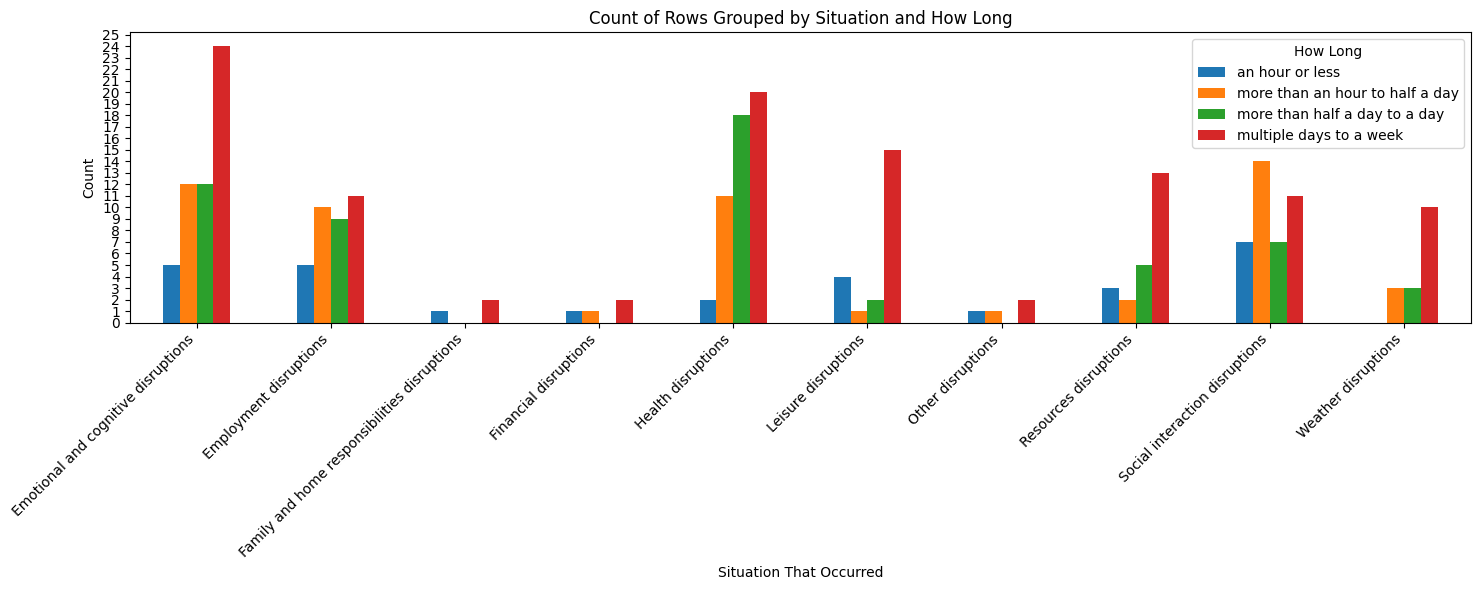

In [8]:
# prompt: plot count of rows grouped by situation_that_occurred and how_long values ['an hour or less', 'more than half a day to a day', 'more than an hour to half a day','multiple days to a week']

# Group the data by 'situation_that_occurred' and 'how-long' and count the rows
grouped_data = dis_data_health_short.groupby(['situation_that_occurred', 'how-long'])['pid*gid*cid'].count().unstack()

# Plot the count of rows
grouped_data.plot(kind='bar', figsize=(15, 6))
plt.title('Count of Rows Grouped by Situation and How Long')
plt.xlabel('Situation That Occurred')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='How Long')

# Set y-axis ticks to whole integers
# Replace NaN values with 0 before finding the maximum
max_value = np.nan_to_num(grouped_data.values).max()
plt.yticks(range(0, int(max_value) + 2)) # +2 to ensure the maximum value is included and has some space above

plt.tight_layout()
plt.show()

## health goals disrupted more than a week

In [9]:
# prompt: filter disruption_data where goal_categories is Health and how-long is week

dis_data_health_long = disruption_data[
    (disruption_data['goal_categories'] == 'Health') &
    (disruption_data['how-long'].isin(['multiple weeks to a month','multiple months to a year','longer than a year']))
]
dis_data_health_long[['goal-statement','goal_categories','circumstance','situation_that_occurred','how-long']]


,goal-statement,goal_categories,circumstance,situation_that_occurred,how-long
4,Quell fears,Health,Lack of financial independence,Financial disruptions,longer than a year
5,Quell fears,Health,Social stress,Social interaction disruptions,longer than a year
7,Quell fears,Health,Real estate slowing,Financial disruptions,longer than a year
9,Trust the universe,Health,I am not experiencing immediate relief,Emotional and cognitive disruptions,longer than a year
15,Fight harder against the enemy,Health,I feel scared to call/ I know I have to speak ...,Social interaction disruptions,longer than a year
...,...,...,...,...,...
720,Gain at least 2 lbs per month,Health,Alcohol,Social interaction disruptions,multiple weeks to a month
723,Focusing more on my mental health at this moment,Health,Family situations hectic siblings in general,Social interaction disruptions,multiple months to a year
724,Focusing more on my mental health at this moment,Health,The stress from the family makes me depressed,Social interaction disruptions,multiple months to a year
760,workout 3-4 times a week,Health,injured my knee while at work,Health disruptions,multiple months to a year


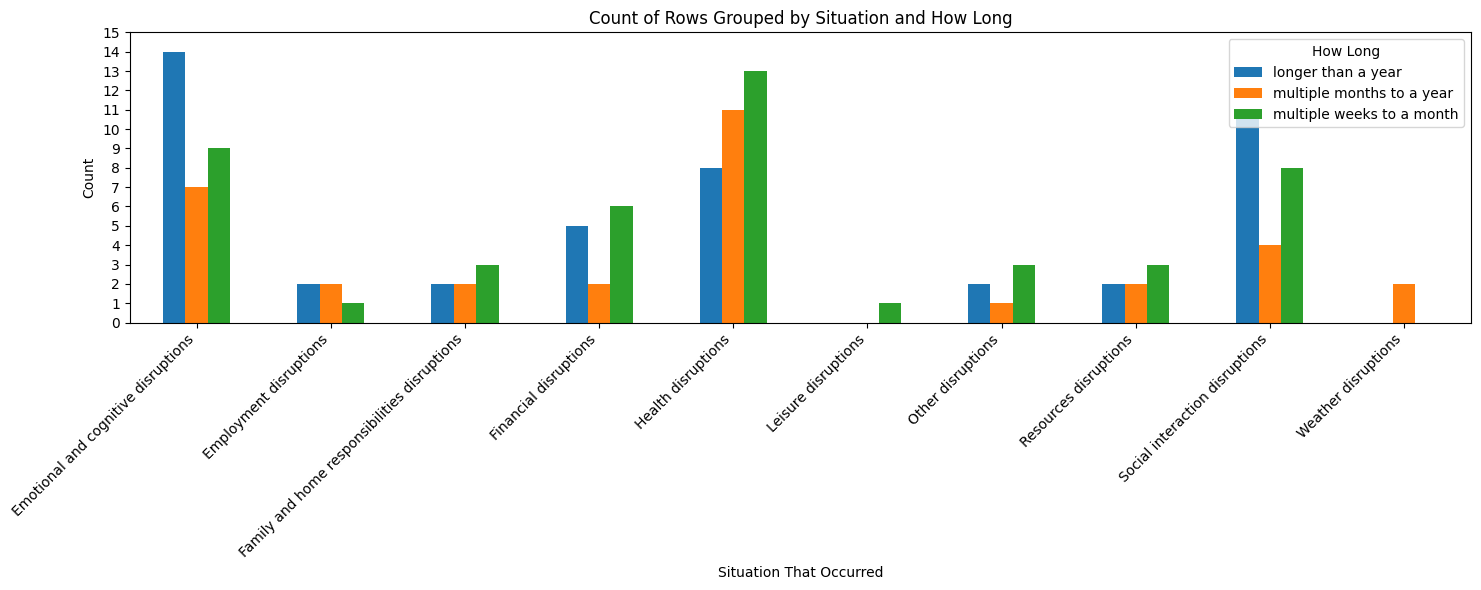

In [10]:
# prompt: plot count of rows grouped by situation_that_occurred and how_long values ['an hour or less', 'more than half a day to a day', 'more than an hour to half a day']

# Group the data by 'situation_that_occurred' and 'how-long' and count the rows
grouped_data = dis_data_health_long.groupby(['situation_that_occurred','how-long'])['pid*gid*cid'].count().unstack()

# Plot the count of rows
grouped_data.plot(kind='bar', figsize=(15, 6))
plt.title('Count of Rows Grouped by Situation and How Long')
plt.xlabel('Situation That Occurred')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='How Long')


# Set y-axis ticks to whole integers
# Replace NaN values with 0 before finding the maximum
max_value = np.nan_to_num(grouped_data.values).max()
plt.yticks(range(0, int(max_value) + 2)) # +2 to ensure the maximum value is included and has some space above

plt.tight_layout()
plt.show()

# financial goals

In [11]:
# filter disruption_data where goal_categories is Financial and how-long is 'an hour or less', 'more than half a day to a day',  'more than an hour to half a day', 'multiple days to a week'

dis_data_fin_short = disruption_data[
    (disruption_data['goal_categories'] == 'Finances') & (disruption_data['how-long'].isin(['an hour or less', 'more than half a day to a day', 'more than an hour to half a day','multiple days to a week', 'multiple weeks to a month']))]

dis_data_fin_short[['goal-statement','goal_categories','circumstance','situation_that_occurred','how-long']]




,goal-statement,goal_categories,circumstance,situation_that_occurred,how-long
29,Get my own place to live,Finances,I have no I.D and my friend didn’t show up wit...,Social interaction disruptions,multiple days to a week
30,Get a car,Finances,None of my friends actually have shown up to h...,Social interaction disruptions,multiple days to a week
65,save up enough money to move out,Finances,things to pay for,Financial disruptions,multiple days to a week
67,save up enough money to move out,Finances,not having enough money to save up,Financial disruptions,multiple weeks to a month
68,save up enough money to move out,Finances,going out and spending money instead of saving it,Leisure disruptions,multiple weeks to a month
...,...,...,...,...,...
743,Financial wellness,Finances,Unexpected expense,Financial disruptions,multiple weeks to a month
756,Save money for a newer car,Finances,My brakes went out on me 2 days ago,Resources disruptions,multiple weeks to a month
757,Save money for a newer car,Finances,the damage to my car was far worse than antici...,Financial disruptions,multiple weeks to a month
758,Save money for a newer car,Finances,the cheaper pads that I could have used were o...,Financial disruptions,more than half a day to a day


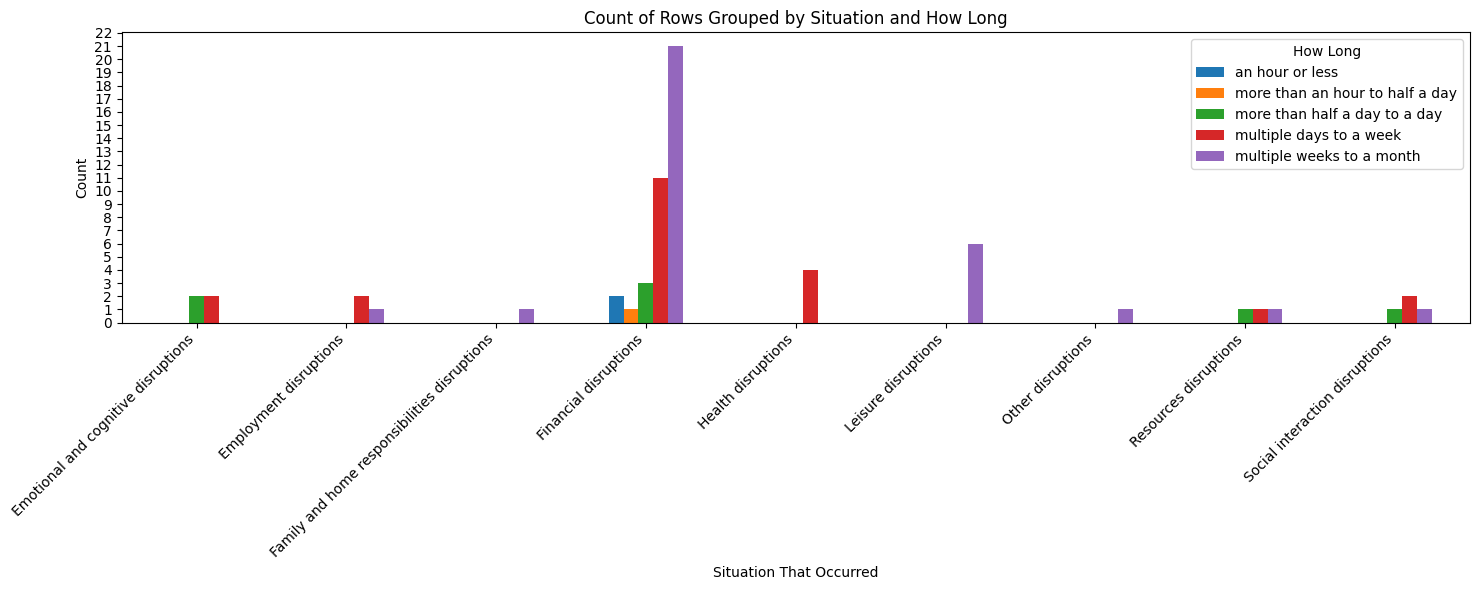

In [12]:
# Group the data by 'situation_that_occurred' and 'how-long' and count the rows
grouped_data = dis_data_fin_short.groupby(['situation_that_occurred', 'how-long'])['pid*gid*cid'].count().unstack()

# Plot the count of rows
grouped_data.plot(kind='bar', figsize=(15, 6))
plt.title('Count of Rows Grouped by Situation and How Long')
plt.xlabel('Situation That Occurred')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='How Long')

# Set y-axis ticks to whole integers
# Replace NaN values with 0 before finding the maximum
max_value = np.nan_to_num(grouped_data.values).max()
plt.yticks(range(0, int(max_value) + 2)) # +2 to ensure the maximum value is included and has some space above

plt.tight_layout()
plt.show()

In [13]:
# filter disruption_data where goal_categories is Financial and how-long is

dis_data_fin_long = disruption_data[
    (disruption_data['goal_categories'] == 'Finances') & (disruption_data['how-long'].isin(['multiple months to a year','longer than a year']))]

dis_data_fin_long[['goal-statement','goal_categories','circumstance','situation_that_occurred','how-long']]


,goal-statement,goal_categories,circumstance,situation_that_occurred,how-long
0,Financial independence,Finances,Location,Resources disruptions,longer than a year
1,Financial independence,Finances,Motivation,Emotional and cognitive disruptions,longer than a year
2,Financial independence,Finances,Mobility,Health disruptions,longer than a year
21,saving for a house,Finances,spent money on other expenses,Financial disruptions,longer than a year
66,save up enough money to move out,Finances,"biweekly payments, having to stretch money more",Financial disruptions,multiple months to a year
...,...,...,...,...,...
704,save for satellite internet,Finances,inflation grocery expenses,Financial disruptions,multiple months to a year
716,Saving money,Finances,fixing retaining wall,Financial disruptions,multiple months to a year
718,Invest $500 a month into ROTH IRA,Finances,Unexpected bills,Financial disruptions,multiple months to a year
742,Financial wellness,Finances,Habitual overspending,Financial disruptions,longer than a year


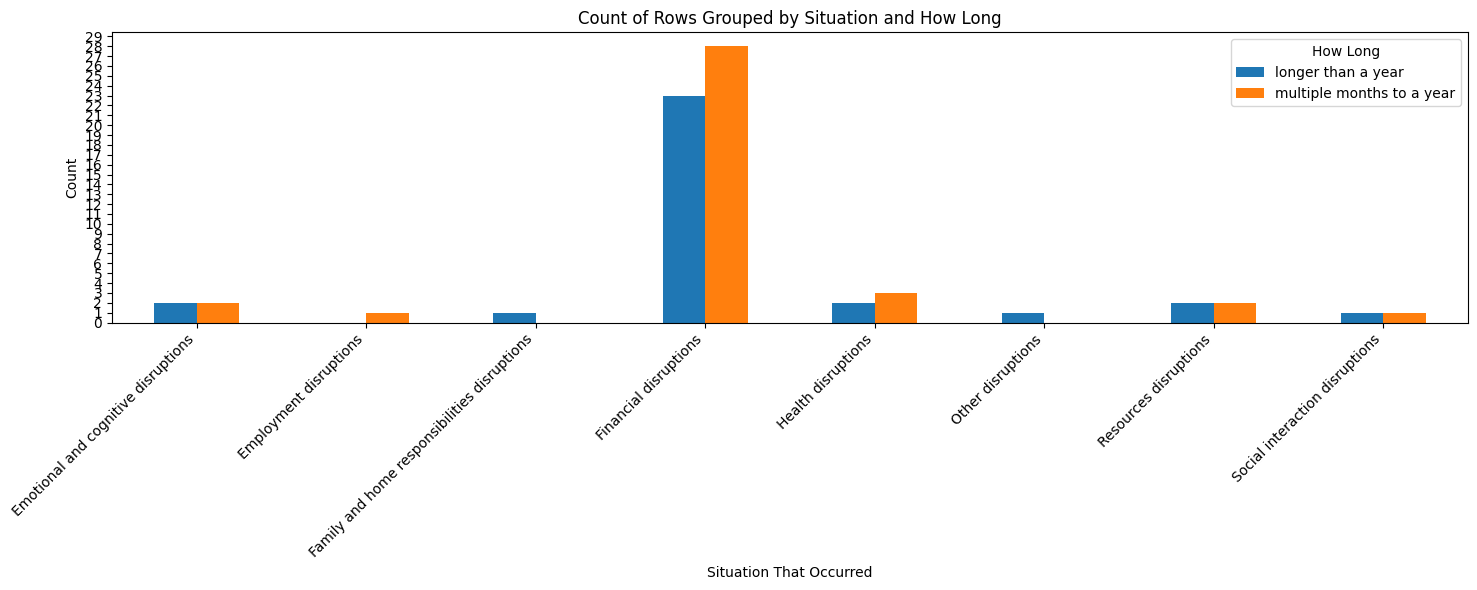

In [14]:
# Group the data by 'situation_that_occurred' and 'how-long' and count the rows
grouped_data = dis_data_fin_long.groupby(['situation_that_occurred', 'how-long'])['pid*gid*cid'].count().unstack()

# Plot the count of rows
grouped_data.plot(kind='bar', figsize=(15, 6))
plt.title('Count of Rows Grouped by Situation and How Long')
plt.xlabel('Situation That Occurred')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='How Long')

# Set y-axis ticks to whole integers
# Replace NaN values with 0 before finding the maximum
max_value = np.nan_to_num(grouped_data.values).max()
plt.yticks(range(0, int(max_value) + 2)) # +2 to ensure the maximum value is included and has some space above

plt.tight_layout()
plt.show()

# work and education goals

In [15]:
# filter disruption_data where goal_categories is Financial and how-long is 'an hour or less', 'more than half a day to a day',  'more than an hour to half a day', 'multiple days to a week'

dis_data_work_short = disruption_data[
    (disruption_data['goal_categories'] == 'Work/Education') & (disruption_data['how-long'].isin(['an hour or less', 'more than half a day to a day', 'more than an hour to half a day']))]

dis_data_work_short[['goal-statement','goal_categories','circumstance','situation_that_occurred','how-long']]




,goal-statement,goal_categories,circumstance,situation_that_occurred,how-long
46,advancing my knowledge at my work place,Work/Education,taking on too many things at once,Employment disruptions,more than half a day to a day
100,applying for IT jobs,Work/Education,Important family matters,Social interaction disruptions,an hour or less
102,finishing my Bachelor's degree studies,Work/Education,Checking on important online updates,Social interaction disruptions,an hour or less
134,Setting up my business,Work/Education,Having time to work on the loose ends,Family and home responsibilities disruptions,more than half a day to a day
203,Advance career goals,Work/Education,Technical Issues,Resources disruptions,more than half a day to a day
204,Advance career goals,Work/Education,Tight Deadlines,Employment disruptions,more than half a day to a day
205,Advance career goals,Work/Education,Miscommunication,Social interaction disruptions,more than half a day to a day
219,reading self-help books daily,Work/Education,MOVIES,Leisure disruptions,more than half a day to a day
226,Regularly practice and learn coding,Work/Education,My in-laws were visiting for the weekend,Social interaction disruptions,more than an hour to half a day
227,Regularly practice and learn coding,Work/Education,I had to deep clean my apartment,Family and home responsibilities disruptions,more than half a day to a day


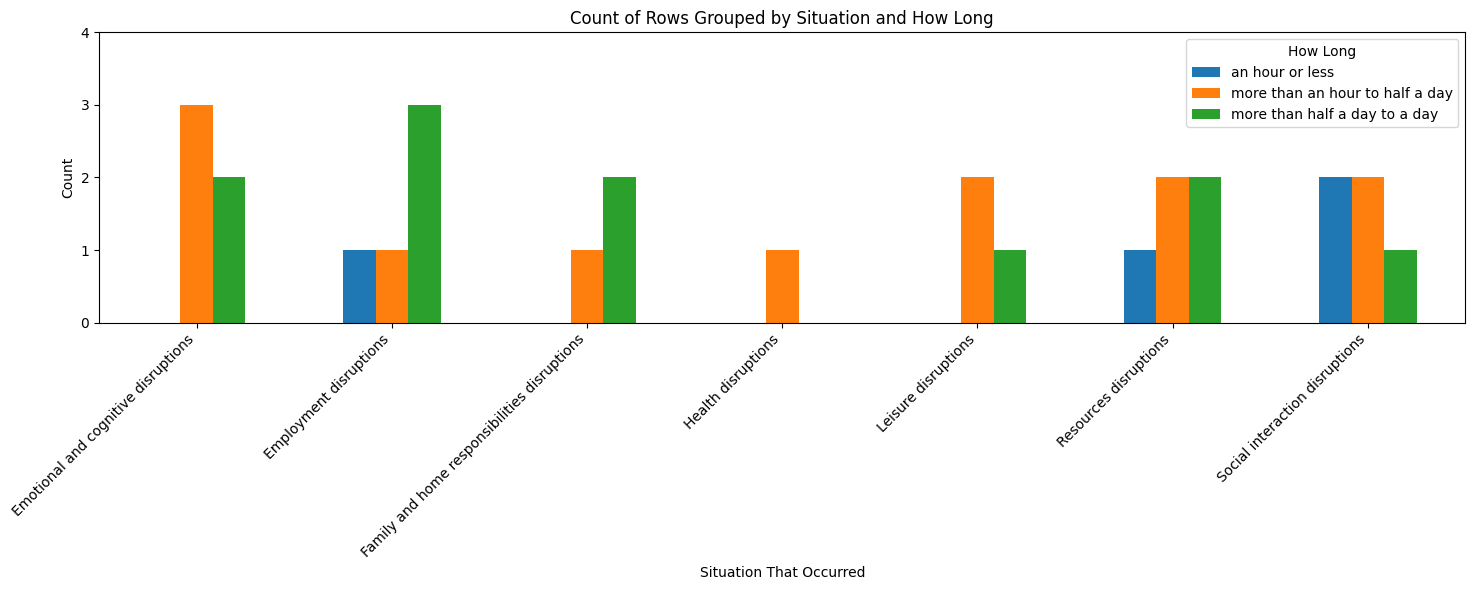

In [16]:
# Group the data by 'situation_that_occurred' and 'how-long' and count the rows
grouped_data = dis_data_work_short.groupby(['situation_that_occurred', 'how-long'])['pid*gid*cid'].count().unstack()

# Plot the count of rows
grouped_data.plot(kind='bar', figsize=(15, 6))
plt.title('Count of Rows Grouped by Situation and How Long')
plt.xlabel('Situation That Occurred')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='How Long')

# Set y-axis ticks to whole integers
# Replace NaN values with 0 before finding the maximum
max_value = np.nan_to_num(grouped_data.values).max()
plt.yticks(range(0, int(max_value) + 2)) # +2 to ensure the maximum value is included and has some space above

plt.tight_layout()
plt.show()

In [17]:
# filter disruption_data where goal_categories is Financial and how-long is 'an hour or less', 'more than half a day to a day',  'more than an hour to half a day', 'multiple days to a week'

dis_data_work_medium = disruption_data[
    (disruption_data['goal_categories'] == 'Work/Education') & (disruption_data['how-long'].isin(['multiple days to a week', 'multiple weeks to a month']))]

dis_data_work_medium[['goal-statement','goal_categories','circumstance','situation_that_occurred','how-long']]

,goal-statement,goal_categories,circumstance,situation_that_occurred,how-long
45,advancing my knowledge at my work place,Work/Education,they pay check i just got ;(,Financial disruptions,multiple days to a week
47,advancing my knowledge at my work place,Work/Education,lacking patience,Emotional and cognitive disruptions,multiple days to a week
48,advancing my knowledge at my work place,Work/Education,comparing my job to other possibilities,Emotional and cognitive disruptions,multiple days to a week
49,advancing my knowledge at my work place,Work/Education,my ego,Emotional and cognitive disruptions,multiple days to a week
73,graduate college,Work/Education,money struggles,Financial disruptions,multiple days to a week
145,Finding a career path,Work/Education,Little time [due to current job],Employment disruptions,multiple weeks to a month
146,Finding a career path,Work/Education,Don't know what I want to do,Emotional and cognitive disruptions,multiple weeks to a month
148,I have a goal to continue to grow my business ...,Work/Education,Fear of further failure.,Emotional and cognitive disruptions,multiple weeks to a month
149,I have a goal to continue to grow my business ...,Work/Education,Not having the money to spend on marketing.,Resources disruptions,multiple weeks to a month
182,get a job,Work/Education,low drive,Emotional and cognitive disruptions,multiple weeks to a month


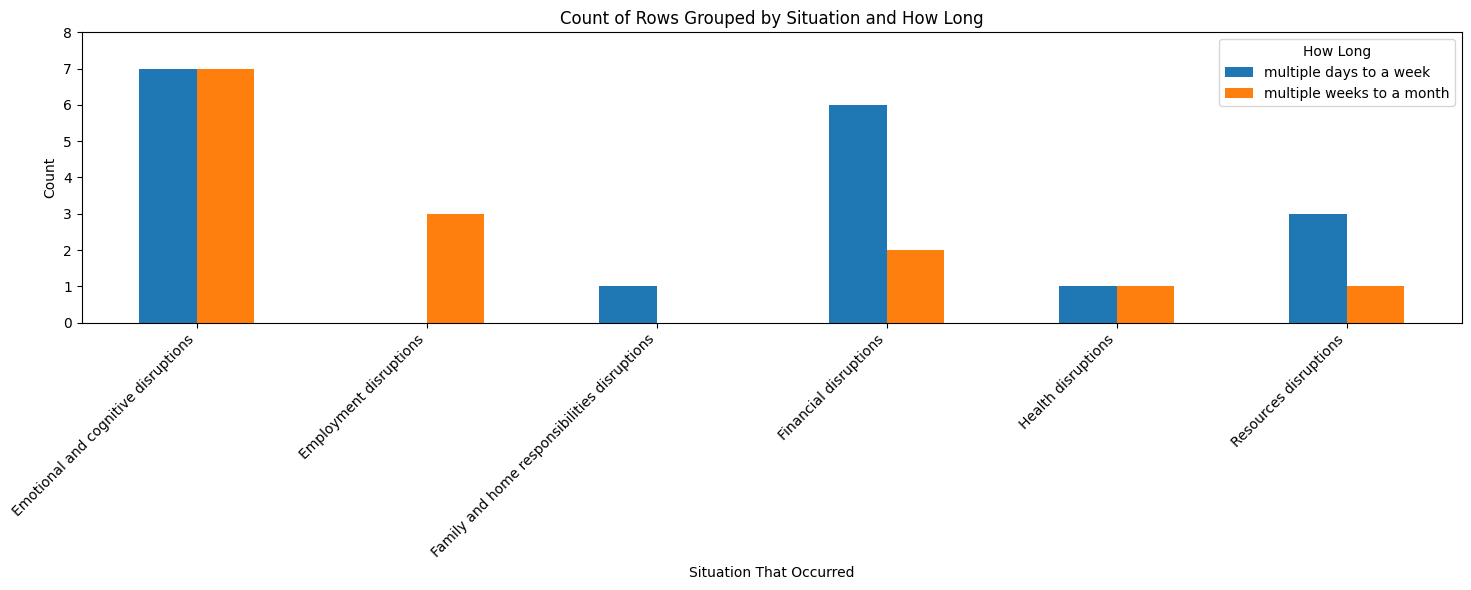

In [18]:
# Group the data by 'situation_that_occurred' and 'how-long' and count the rows
grouped_data = dis_data_work_medium.groupby(['situation_that_occurred', 'how-long'])['pid*gid*cid'].count().unstack()

# Plot the count of rows
grouped_data.plot(kind='bar', figsize=(15, 6))
plt.title('Count of Rows Grouped by Situation and How Long')
plt.xlabel('Situation That Occurred')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='How Long')

# Set y-axis ticks to whole integers
# Replace NaN values with 0 before finding the maximum
max_value = np.nan_to_num(grouped_data.values).max()
plt.yticks(range(0, int(max_value) + 2)) # +2 to ensure the maximum value is included and has some space above

plt.tight_layout()
plt.show()

In [19]:
# filter disruption_data where goal_categories is Financial and how-long is 'an hour or less', 'more than half a day to a day',  'more than an hour to half a day', 'multiple days to a week'

dis_data_work_long= disruption_data[
    (disruption_data['goal_categories'] == 'Work/Education') & (disruption_data['how-long'].isin(['multiple months to a year', 'longer than a year']))]

dis_data_work_long[['goal-statement','goal_categories','circumstance','situation_that_occurred','how-long']]

,goal-statement,goal_categories,circumstance,situation_that_occurred,how-long
69,read more,Work/Education,being on my phone more often,Leisure disruptions,multiple months to a year
70,read more,Work/Education,lack of attention span,Emotional and cognitive disruptions,multiple months to a year
71,read more,Work/Education,being in a reading slump,Emotional and cognitive disruptions,multiple months to a year
72,graduate college,Work/Education,struggling in classes,Employment disruptions,multiple months to a year
74,graduate college,Work/Education,mental health issues,Emotional and cognitive disruptions,multiple months to a year
139,get job,Work/Education,anxiety,Emotional and cognitive disruptions,longer than a year
147,I have a goal to continue to grow my business ...,Work/Education,Lack of interaction with my business online.,Employment disruptions,multiple months to a year
150,I have a goal to continue to grow my business ...,Work/Education,Not having the money to be able to go to vendi...,Resources disruptions,multiple months to a year
154,Find a job,Work/Education,Currently homeless,Other disruptions,multiple months to a year
155,Find a job,Work/Education,Currently without childcare and it is summer s...,Family and home responsibilities disruptions,multiple months to a year


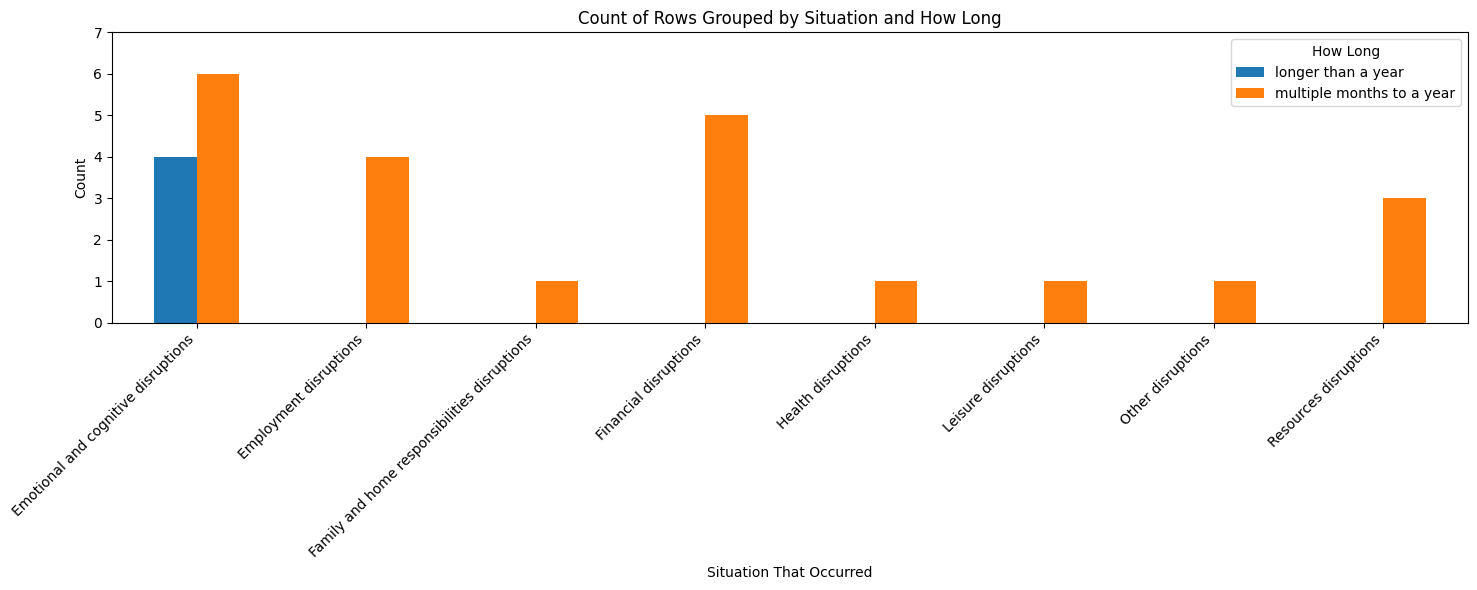

In [20]:
# Group the data by 'situation_that_occurred' and 'how-long' and count the rows
grouped_data = dis_data_work_long.groupby(['situation_that_occurred', 'how-long'])['pid*gid*cid'].count().unstack()

# Plot the count of rows
grouped_data.plot(kind='bar', figsize=(15, 6))
plt.title('Count of Rows Grouped by Situation and How Long')
plt.xlabel('Situation That Occurred')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='How Long')

# Set y-axis ticks to whole integers
# Replace NaN values with 0 before finding the maximum
max_value = np.nan_to_num(grouped_data.values).max()
plt.yticks(range(0, int(max_value) + 2)) # +2 to ensure the maximum value is included and has some space above

plt.tight_layout()
plt.show()

# relationship goals

In [21]:
dis_data_rel_short= disruption_data[
    (disruption_data['goal_categories'] == 'Social connection') & (disruption_data['how-long'].isin(['an hour or less', 'more than half a day to a day', 'more than an hour to half a day','multiple days to a week']))]

dis_data_rel_short[['goal-statement','goal_categories','circumstance','situation_that_occurred','how-long']]



,goal-statement,goal_categories,circumstance,situation_that_occurred,how-long
10,Make my children proud of me,Social connection,I feel hopeless in battling my son's injury,Emotional and cognitive disruptions,multiple days to a week
11,Make my children proud of me,Social connection,I feel weak against the enemy,Emotional and cognitive disruptions,multiple days to a week
13,Make my children proud of me,Social connection,I am worried about the storm,Weather disruptions,multiple days to a week
57,being empathetic,Social connection,pride,Emotional and cognitive disruptions,an hour or less
58,saving 50 dollars a week for something my daug...,Social connection,bills,Financial disruptions,an hour or less
59,saving 50 dollars a week for something my daug...,Social connection,not making enough money,Financial disruptions,multiple days to a week
92,Give more to people,Social connection,Energy,Emotional and cognitive disruptions,more than an hour to half a day
115,Stay connected with family,Social connection,Felt too anxious to make phone calls,Emotional and cognitive disruptions,more than an hour to half a day
116,Stay connected with family,Social connection,Family member was busy with work,Social interaction disruptions,more than an hour to half a day
127,spending more time with my family,Social connection,work meetings,Employment disruptions,an hour or less


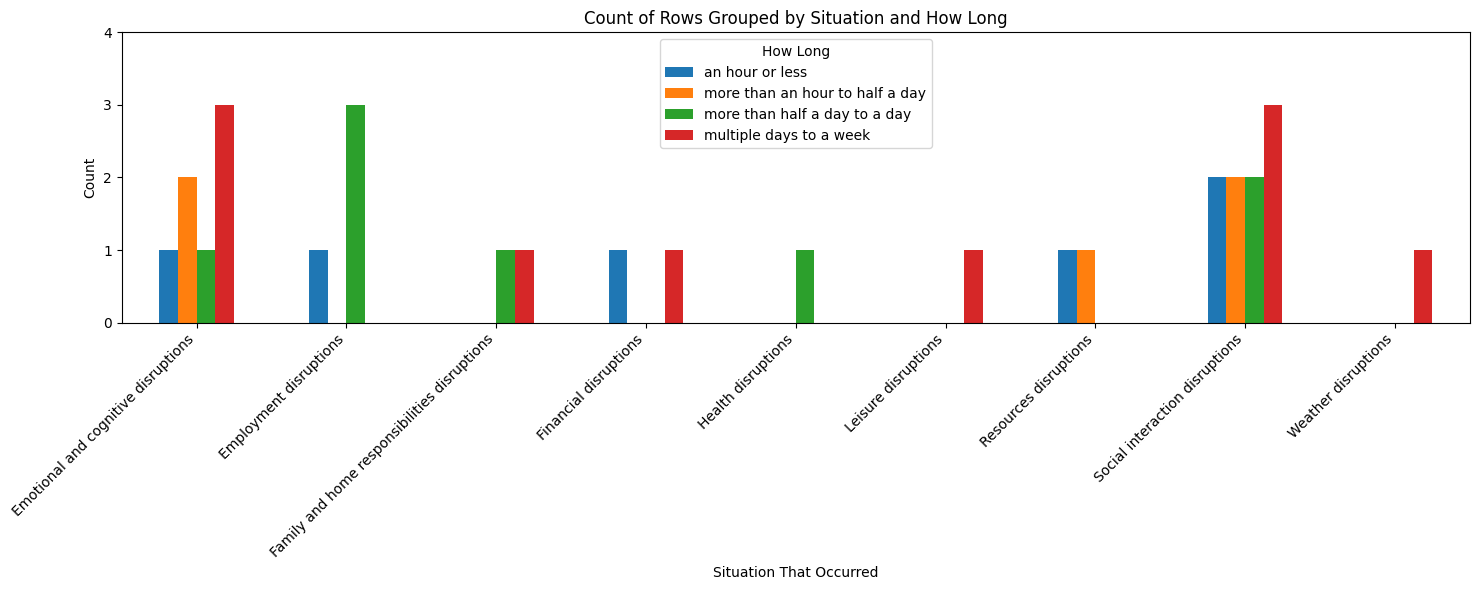

In [22]:
grouped_data = dis_data_rel_short.groupby(['situation_that_occurred', 'how-long'])['pid*gid*cid'].count().unstack()

# Plot the count of rows
grouped_data.plot(kind='bar', figsize=(15, 6))
plt.title('Count of Rows Grouped by Situation and How Long')
plt.xlabel('Situation That Occurred')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='How Long')

# Set y-axis ticks to whole integers
# Replace NaN values with 0 before finding the maximum
max_value = np.nan_to_num(grouped_data.values).max()
plt.yticks(range(0, int(max_value) + 2)) # +2 to ensure the maximum value is included and has some space above

plt.tight_layout()
plt.show()

In [23]:
dis_data_rel_long= disruption_data[
    (disruption_data['goal_categories'] == 'Social connection') & (disruption_data['how-long'].isin(['multiple weeks to a month','multiple months to a year','longer than a year' ]))]

dis_data_rel_long[['goal-statement','goal_categories','circumstance','situation_that_occurred','how-long']]

,goal-statement,goal_categories,circumstance,situation_that_occurred,how-long
12,Make my children proud of me,Social connection,I am feeling pressure that my work is lagging ...,Employment disruptions,longer than a year
14,Make my children proud of me,Social connection,I can't take them anywhere fun because I can't...,Financial disruptions,longer than a year
17,strengthening friendships,Social connection,friend lives far away,Resources disruptions,longer than a year
18,strengthening friendships,Social connection,friend was too busy,Social interaction disruptions,multiple weeks to a month
19,strengthening friendships,Social connection,I had too much homework,Employment disruptions,multiple months to a year
20,strengthening friendships,Social connection,I was too tired to meet with friend,Emotional and cognitive disruptions,multiple months to a year
91,Give more to people,Social connection,Money,Financial disruptions,multiple weeks to a month
93,Give more to people,Social connection,Negativity,Social interaction disruptions,multiple months to a year
94,Give more to people,Social connection,Distance,Resources disruptions,multiple months to a year
160,Improve mine and my daughter's life,Social connection,Mental health issues and circumstances,Emotional and cognitive disruptions,longer than a year


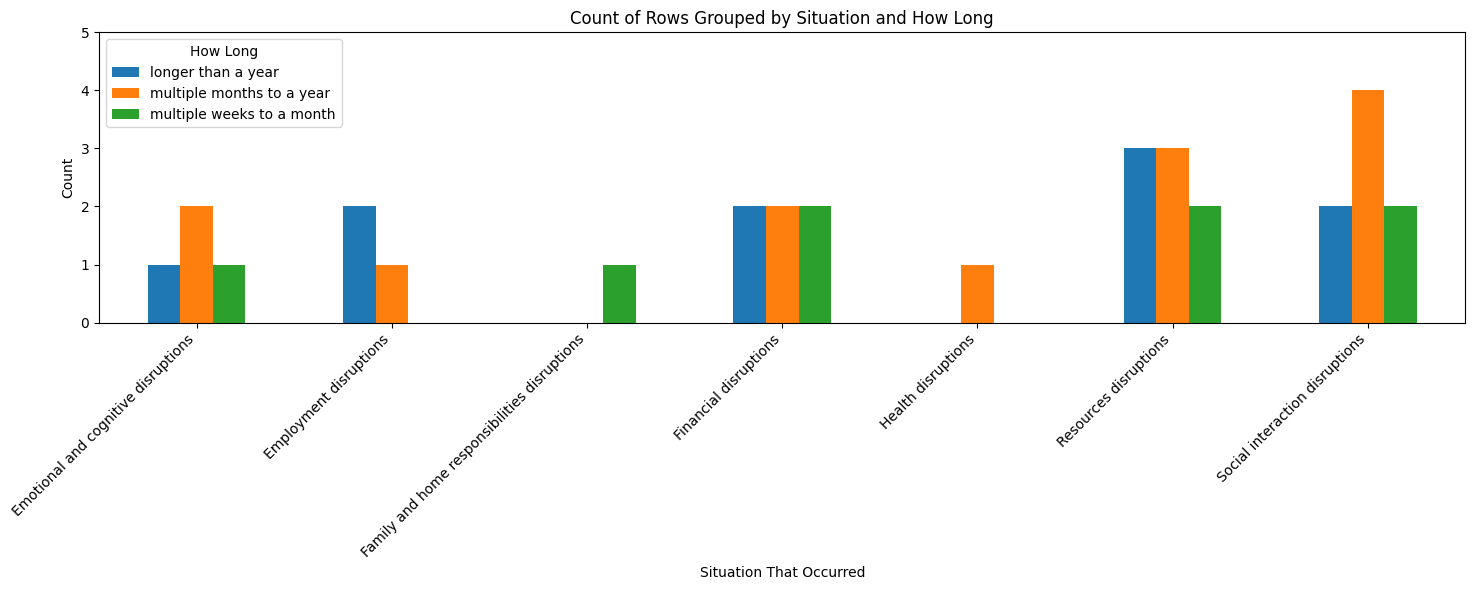

In [24]:
grouped_data = dis_data_rel_long.groupby(['situation_that_occurred', 'how-long'])['pid*gid*cid'].count().unstack()

# Plot the count of rows
grouped_data.plot(kind='bar', figsize=(15, 6))
plt.title('Count of Rows Grouped by Situation and How Long')
plt.xlabel('Situation That Occurred')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='How Long')

# Set y-axis ticks to whole integers
# Replace NaN values with 0 before finding the maximum
max_value = np.nan_to_num(grouped_data.values).max()
plt.yticks(range(0, int(max_value) + 2)) # +2 to ensure the maximum value is included and has some space above

plt.tight_layout()
plt.show()

# Frequency- health goals

In [32]:
# prompt: filter disruption_data where goal_categories is Health and how-long is 'an hour or less', 'more than half a day to a day',  'more than an hour to half a day', 'multiple days to a week'

dis_data_health_freq_often = disruption_data[
    (disruption_data['goal_categories'] == 'Health')

    &(disruption_data['frequency'].isin(['daily', 'weekly']))
]
dis_data_health_freq_often[['goal-statement','goal_categories','circumstance','situation_that_occurred','frequency']]

,goal-statement,goal_categories,circumstance,situation_that_occurred,frequency
3,Quell fears,Health,Son is injured,Family and home responsibilities disruptions,daily
4,Quell fears,Health,Lack of financial independence,Financial disruptions,daily
5,Quell fears,Health,Social stress,Social interaction disruptions,daily
6,Quell fears,Health,Storm coming,Weather disruptions,daily
7,Quell fears,Health,Real estate slowing,Financial disruptions,daily
...,...,...,...,...,...
728,Read my bible daily,Health,Too tired / unmotivated at the end of the day,Emotional and cognitive disruptions,weekly
740,Exercise regularly,Health,Needing a ride to the gym,Resources disruptions,weekly
748,eat healthy food,Health,I can't always afford healthy food,Financial disruptions,weekly
755,exercising three times a week,Health,Family obligations,Social interaction disruptions,weekly
